# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import os

# Installing vader sentiment analyser

In [2]:
!pip install vaderSentiment

# Importing Vader sentiment analyzer

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Importing Dataset

In [4]:
df = pd.read_csv ('IPL_2022_tweets.csv')
df.head()

C:\Users\ABC\AppData\Local\Temp\ipykernel_13480\2560482354.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('IPL_2022_tweets.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 22:00:03,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
1,The Times Of India,New Delhi,News. Views. Analysis. Conversations. India’s ...,2010-04-19 10:50:15,14429584.0,457.0,6.0,True,2022-06-20 21:30:00,How fans of @ViratGang @BoldBrigade @Fanaticso...,"['IPL2022', 'RCB', 'MI', 'CSK', 'TOISportscast']",Twitter Web App,False
2,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 20:00:24,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False
3,𝕊𝕠𝕔𝕚𝕒𝕝 𝔸𝕟𝕚𝕞𝕒𝕝,India,I’m here to avoid my friends on Facebook.,2013-10-15 04:34:14,124.0,502.0,2675.0,False,2022-06-20 19:10:00,@Chigurupati_H WOW!!\n3 ducks with 3 chicks!!\...,['IPL2022'],Twitter for Android,False
4,World Cricket Baba,india,! Links Baba:\nhttps://t.co/L3bxQ4jPHK\nhttps:...,2022-04-13 06:34:29,1076.0,63.0,699.0,False,2022-06-20 19:00:18,👉World Cricket Baba!👈 Top Countries With the \...,"['cricketBaba', 'IPL2022', 'Cricket', 'Deltin7...",Postify1,False


# Analysing the dataset

In [5]:
df.shape

(574664, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574664 entries, 0 to 574663
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         574660 non-null  object 
 1   user_location     384107 non-null  object 
 2   user_description  492536 non-null  object 
 3   user_created      574655 non-null  object 
 4   user_followers    574649 non-null  float64
 5   user_friends      574649 non-null  object 
 6   user_favourites   574649 non-null  object 
 7   user_verified     574649 non-null  object 
 8   date              574649 non-null  object 
 9   text              574649 non-null  object 
 10  hashtags          574620 non-null  object 
 11  source            574640 non-null  object 
 12  is_retweet        574640 non-null  object 
dtypes: float64(1), object(12)
memory usage: 57.0+ MB


In [7]:
df.describe()

,user_followers
count,5.746490e+05
mean,1.120746e+05
std,7.588829e+05
min,0.000000e+00
25%,3.900000e+01
50%,2.030000e+02
75%,1.142000e+03
max,2.011137e+07


In [8]:
#calculating null values in the dataset
df.isnull().sum()

user_name                4
user_location       190557
user_description     82128
user_created             9
user_followers          15
user_friends            15
user_favourites         15
user_verified           15
date                    15
text                    15
hashtags                44
source                  24
is_retweet              24
dtype: int64

We can see that some tweets dont involve any hashtags. Also for some the user location and description and source of tweet is missing, but text column which is required for sentiment analysis doesn't contain any null values.

# Copying text to perform EDA

In [9]:
df['senttext'] = df['text']

## converting data to lowercase

In [10]:
df = df.apply(lambda x: x.astype(str).str.lower())

# Finding insights from the data

<Axes: xlabel='user_location'>

C:\Users\ABC\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  func(*args, **kwargs)
C:\Users\ABC\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\ABC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ABC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


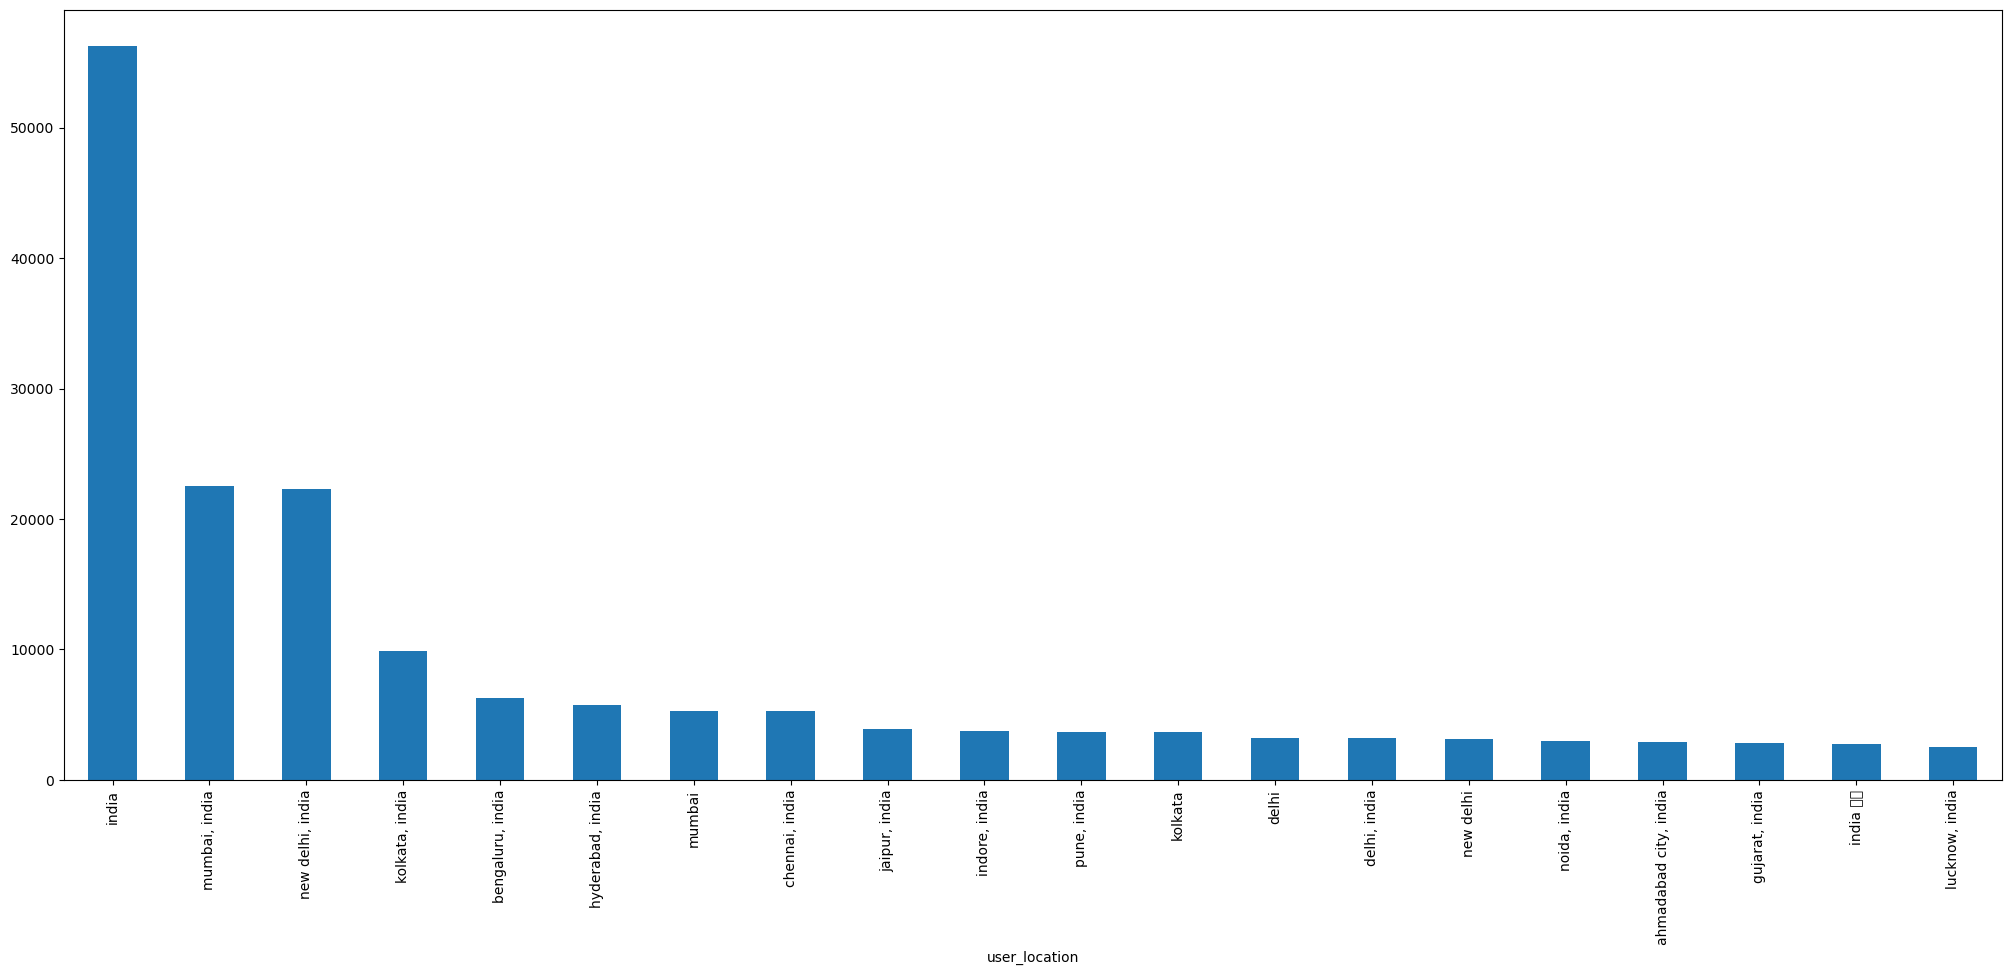

In [11]:
loc_df = df[df.user_location != 'nan']
loc_df.user_location.value_counts().nlargest(20).plot(kind='bar',figsize=(25,10))

Indian cities dominate the top 20 user locations as expected. 'global' and 'worldwide' locations also make it in top 20.

<function matplotlib.pyplot.show(close=None, block=None)>

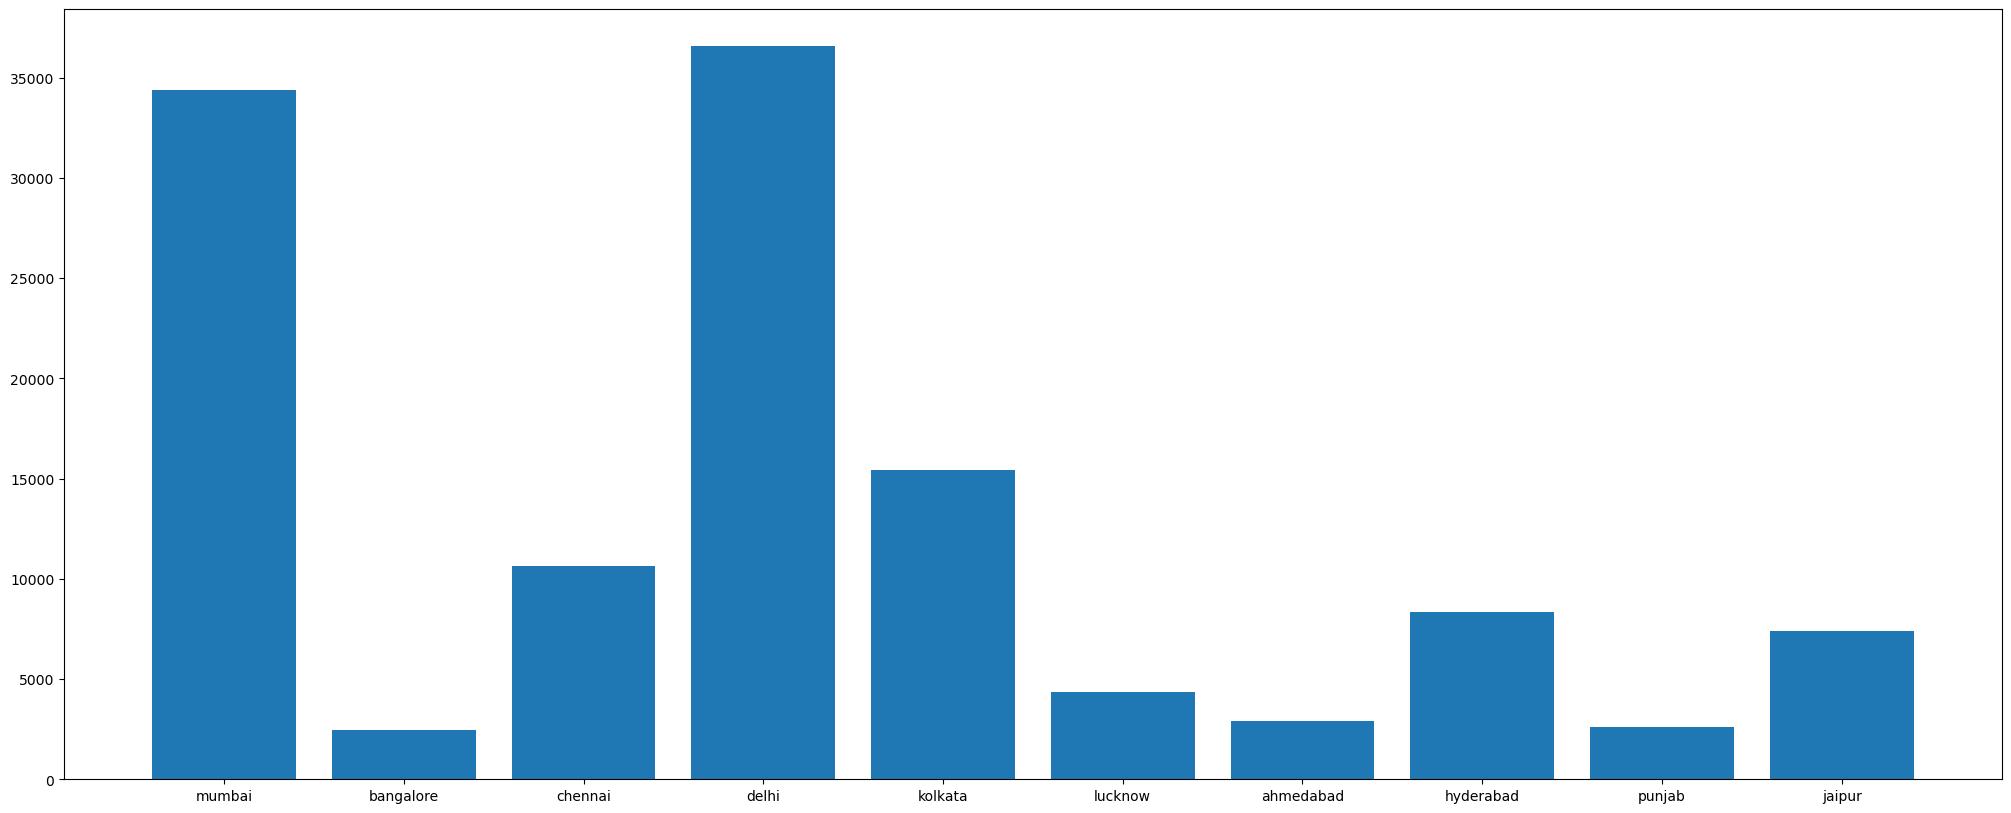

In [12]:
indian_cities = {}
indian_ipl_cities = ['mumbai','bangalore','chennai','delhi','kolkata','lucknow','ahmedabad','hyderabad','punjab','jaipur']
for city in indian_ipl_cities:
    indian_cities[city] = df.user_location.str.count(city).sum()
    
plt.figure(figsize=(25,10))
plt.bar(*zip(*indian_cities.items()))
plt.show

Users in Indian metro cities who have teams in IPL are most active. Other cities like Ahmedabad have much less tweets

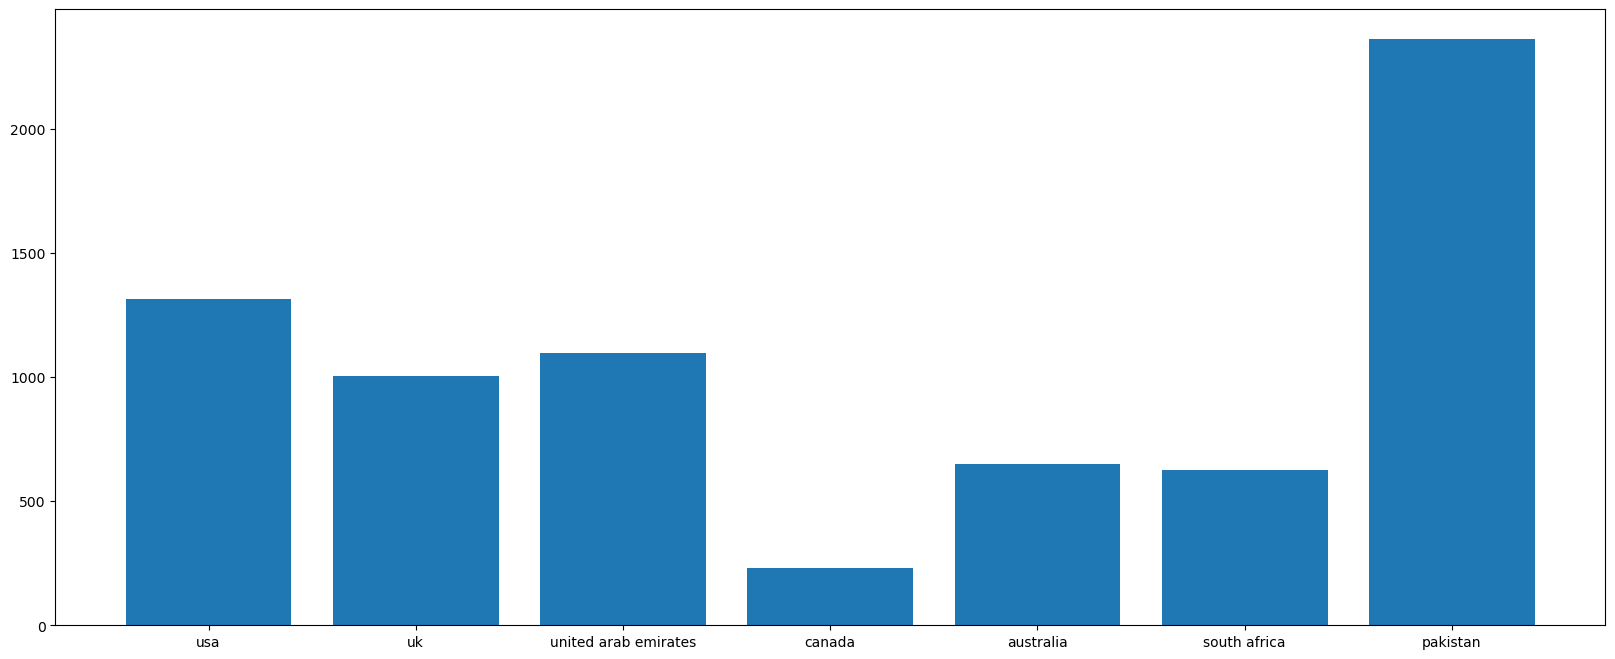

In [13]:
ipl_countries = {}
countries = ['usa', 'uk', 'united arab emirates', 'canada', 'australia', 'south africa', 'pakistan']
for country in countries: 
    ipl_countries[country] = df.user_location.str.count(country).sum()

    
plt.figure(figsize=(20, 8))
plt.bar(*zip(*ipl_countries.items()))

plt.show()

Comparing tweets from countries with top cricket teams and where indian population is high.

<Axes: xlabel='user_verified'>

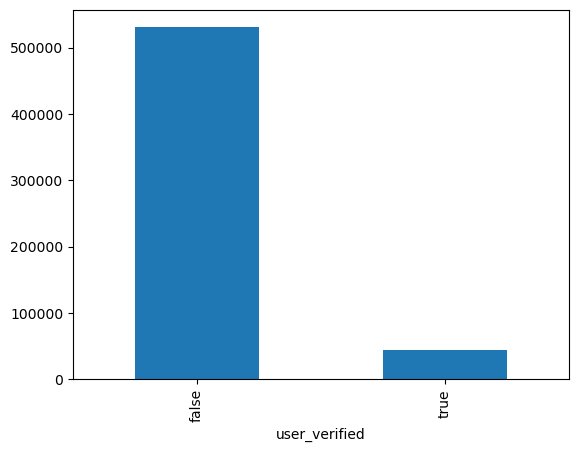

In [14]:
df.user_verified.value_counts().nlargest(2).plot(kind='bar')

As we can see from the plot that most of the users are not verified

<Axes: xlabel='hashtags'>

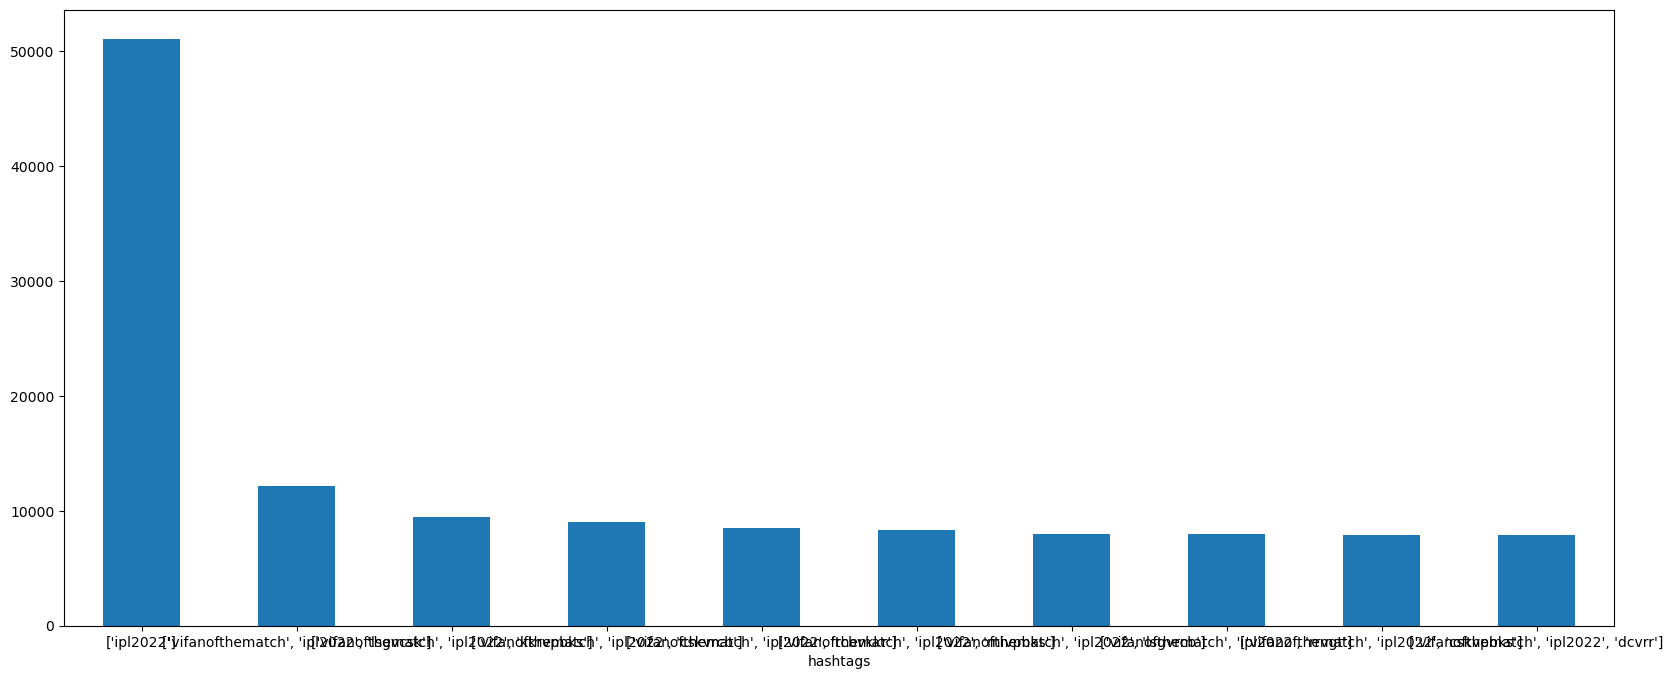

In [15]:
hashtag_df = df[df.hashtags != 'nan']
hashtag_df.hashtags.value_counts().nlargest(10).plot(kind='bar', rot=0, figsize=(20,8))

People used the tournament hashtag the most, with some specific match based and team hashtags also making an appearance

# Removing all the stop words, mentions, hashtags and URLs to create a word cloud

In [16]:
import nltk

In [17]:
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df.text = df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Preprocessing the data

In [18]:
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# df.text = df.text.apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [19]:
df.text = df.text.apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", x).split()))

In [20]:
df.text = df.text.apply(lambda x: ' '.join(re.sub("[\.\,\!\?\:\;\-\=\_\'\*\"|(|)]", " ", x).split()))

In [21]:
df.text = df.text.apply(lambda x: ' '.join(re.sub(r'http\S+', '',x).split()))

In [22]:
df.text.head()

0    👉world cricket baba 👈 top countries 🏆 best cri...
1    fans reacted two new ipl teams gujarat titans ...
2    👉world cricket baba 👈 top countries 🏆 best cri...
3                               h wow 3 ducks 3 chicks
4    👉world cricket baba 👈 top countries 🏆 best cri...
Name: text, dtype: object

data is cleaned except emoji

# Creating Wordcloud

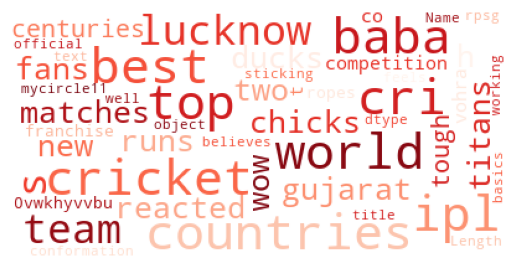

In [23]:
wordcloud = WordCloud(
                          background_color='white',
                          colormap='Reds',
                          max_words=200,
                          max_font_size=40, 
                          random_state=49
                         ).generate(str(df['text']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Replacing the Emojis

In [24]:
try:
    # UCS-4
    e = re.compile(u'[\U00010000-\U0010ffff]')
except re.error:
    # UCS-2
    e = re.compile(u'[\uD800-\uDBFF][\uDC00-\uDFFF]')
emojis = []
for x in df.text:
    match  = e.search(x)
    if match:
        emojis.append(match.group())

In [25]:
dfe =  pd.DataFrame(emojis,columns=['text'])
pd.Series(' '.join(dfe['text']).lower().split()).value_counts()[:10]

🔥    12132
🏏    10334
👉     6741
𓃵     6147
😍     5583
😂     4358
💛     4206
👏     3941
🏆     3237
𓃬     3094
Name: count, dtype: int64

# Training Model

## Finding similar words using word2vec

In [26]:
num_features = 400    # Word vector dimensionality                      
min_word_count = 5   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

wt = [list(x.split()) for x in df.text]
from gensim.models import word2vec
print ("Training model...")
wv_model = word2vec.Word2Vec(wt, workers=num_workers, \
            vector_size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

wv_model.init_sims(replace=True)

Training model...


C:\Users\ABC\AppData\Local\Temp\ipykernel_13480\3546914480.py:14: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  wv_model.init_sims(replace=True)


In [27]:
wv_model.wv.most_similar("ipl") 

[('ipl2022', 0.4282451272010803),
 ('icc', 0.40430334210395813),
 ('registered', 0.4003566801548004),
 ('stat', 0.3985140919685364),
 ('currently', 0.38567808270454407),
 ('registers', 0.3810619115829468),
 ('feature', 0.38070523738861084),
 ('🏏ipl', 0.3784734308719635),
 ('ongoing', 0.377288818359375),
 ('edition', 0.37710657715797424)]

In [28]:
wv_model.wv.most_similar("captain") 

[('captaincy', 0.7297782301902771),
 ('leadership', 0.5988460779190063),
 ('skipper', 0.5947954654693604),
 ('captaining', 0.5920701622962952),
 ('leader', 0.5914711356163025),
 ('captains', 0.5807156562805176),
 ('versa', 0.576713502407074),
 ('lead', 0.5410655736923218),
 ('captian', 0.5132790803909302),
 ('captained', 0.5054488778114319)]

# Now applying VADER sentiment analyser

In [29]:
analyser = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['senttext'].apply(lambda x: analyser.polarity_scores(str(x)))

In [30]:
def sentiment_func(sentiment):
    for k,v in sentiment.items():
        if (k== 'pos' or k or 'neg' or k == 'neu') == True:
            if (sentiment['pos'] > 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] < 0.5) == True:
                return 'positive'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] > 0.5 and sentiment['neu'] < 0.5) == True:
                return 'negative'
            elif (sentiment['pos'] < 0.5 and sentiment['neg'] < 0.5 and sentiment['neu'] > 0.5) == True:
                return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(sentiment_func)

<Axes: xlabel='sentiment'>

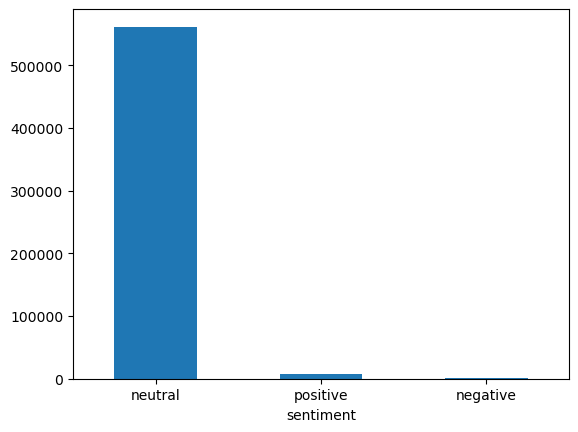

In [31]:
df.sentiment.value_counts().plot(kind='bar', rot=0)

Most the tweets are neutral. This can be due to most tweets just containing score updates or match updates.
Number of positive tweets are more than negative. Seems like people were very happy with tournament happening at such difficult time and people got excited and happy to see their favorite cricketers back on pitch.¶


In [32]:
df.sentiment.value_counts()

sentiment
neutral     561264
positive      7146
negative      1324
Name: count, dtype: int64